# Introduction


Organic chemistry has as one of its major goals the synthesis of molecules such as drugs or natural products, being thus a discipline of great importance in today's society. Nonetheless, this subject may seem intimidating at first sight.

Among the hardest exercises that are given during organic chemistry lectures are those that require the synthesis of a target molecule from different reactants. The main difficulty of such an exercise is to identify the possible bond disconnections that may take place in the target molecule. Once several disconnections are spotted, the best one may be chosen.

However, for a student beginning the study of organic chemistry, being able to identify the possible disconnections may be hard and requires a lot of practice.

Keeping this in mind, our team came up with the following idea: a package that has functions which may identify possible bond disconnections in a molecule would be of great help to first/second year bachelor chemistry students. This idea was implemented in the package chemicalbd (chemical bonds disconnector). The package functions in the package allow to display the target molecule and the reactants from which it could be formed.

# Results and Discussions

## First Function

The module from which all the functions performing disconnections may be imported is called bond_disconnector.

The first function that was implemented in the project is C_S_disconnection. This function identifies the bond C(sp3)-S and disconnects it, giving the reactants from which such a bond may be formed: a thiol in the presence of potassium carbonate, and an alkyl halide. The two reactants give a classical SN2 reaction that produces the target molecule

In order to achieve this, it was first of all searched if the molecule contains the following SMARTS pattern: '[C^3][S]', which signifies an sp3 hybridized carbon linked to a sulphur atom. Than, the function ReactantsFromSmarts belonging to rdkit was employed. It basically identifies a pattern in a molecule (the SMARTS of the pattern is given to the function) and transforms it into another pattern (which also needs to be stated in the function ReactantsFromSmarts). Thus, a reverse reaction, **a disconnection**, is defined. This disconnection was applied to the target molecule and an iodine atom (which was needed in order to form one of the two reactants that could form the bond in the target molecule). This was done using the function RunReactants. The reactants needed were then returned and displayed.

The function takes in its input a Mol object (object speciffic to rdkit). The functionality of C_S disconnection is ilustrated in the cell below.

C(sp3)-S disconection available
--------------------------------------
Option 1
Reactant 1


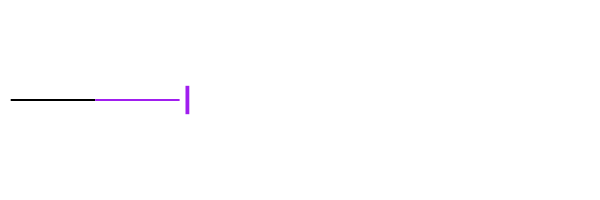

Reactant 2


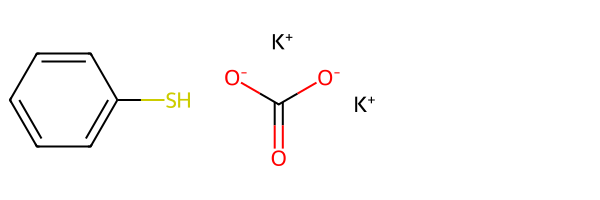

--------------------------------------
--------------------------------------


[1,

In [1]:
from chemicalbd.bond_disconnector import C_S_disconnection
from rdkit import Chem
from IPython.display import display

mol_smiles = 'c1ccccc1SC'  #Defines to molecule to be analyzed, using its SMILES representation
mol = Chem.MolFromSmiles(mol_smiles) #The a Mol object is created from the SMILES representation
C_S_disconnection(mol) #The function is performed.

The function displays in the beginning the reactants from which the bond can be formed: methyl iodide as reactant 1, and tiophenol in the presence of a weak base, potassium carbonate (the base is needed in order to deprotonate the tiophenol) as reactant 2.

However, this is not everything that the function returns. It also returns a list.

The first element of the list is 1. This represents that a C(sp3)-S was indeed found in the molecule. If this was not the case, a list containing only 0 would have been returned. The reason for which 1 or 0 is returned in a list is related to the last function, disconnections, and will be explained during the section of the report corresponding to that function. 

In the example below, it may be observed that only a list containing 0 is returned, as the molecule analyzed contains no C(sp3)-S bond.

In [2]:
mol_smiles = 'c1ccccc1OC'  #Defines to molecule to be analyzed, using its SMILES representation
mol = Chem.MolFromSmiles(mol_smiles) #The a Mol object is created from the SMILES representation
C_S_disconnection(mol) #The function is performed.

[0]

Returning to the example where the C(sp3)-S bond was present, apart from 1, the list returned contained as a second element another list. That list contains 3 Mol objects, each corresponding to one of the molecules that are displayed.

In fact, the function did not return such a list in its first version. However, it was observed that if the function only displays the molecules but doesn't return something related to the molecules displayed, there is no reliable way to test that it indeed the good molecules are displayed. Therefore, the mol objects, corresponding to the displayed molecules, are also returned. During the tests corresponding to the case that the bond, or molecular pattern, searched is present in the target molecule, the SMILES of the molecules expected to be displayed are searched in a list of SMILES strings corresponding to the returned molecules.

The function can also handle TypeErrors, in the case that the input is not a mol object. An example may be observed in the cell below.

In [3]:
mol_smiles = 'c1ccccc1SC'  #Defines to molecule to be analyzed, using its SMILES representation
mol = Chem.MolFromSmiles(mol_smiles) #The a Mol object is created from the SMILES representation
C_S_disconnection('molecule') #The function is performed.

TypeError:  Invalid type <class 'str'>: 'mol' Should be passed as a mol object.

The function can also handle more complicate cases. The following example is considered as the target molecule.

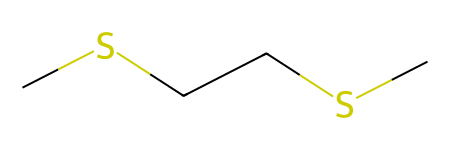

In [16]:
mol_smiles_complicated = 'CSCCSC' #Defines to molecule to be analyzed, using its SMILES representation
mol_complicated = Chem.MolFromSmiles(mol_smiles_complicated) #The a Mol object is created from the SMILES representation
display(mol_complicated) #The molecule is displayed

This molecule contains thiol functional groups. For each of the two groups, there are 2 C(sp3)-S bonds. Thus, there should be in principle 4 possible disconnections. But this is not the case, as in fact the molecule is symmetric. The 4 hypothetical disonnections could be formed grouped in 2 pairs, each pair containing two identical disonnections. Therefore, there are only 2 possible disonnections.

When using the rdkit functionality RunReactants for a defined reaction pattern, the expected molecules to be returned (which are usually products if a standard reaction is considered, but in this case they are reactants are reverse reactions, disconnections are considered) are returned as a nested tuple. Each tuple contains the reactants corresponding to a certain reaction site (an example of reaction site for this case would be the reaction site metyl-sulphur from the left of the molecule, or the methyl-sulphur from the right of the molecule) and these tuples are grouped in a tuple.

Thus, the tuple corresponding to the molecule in the example should contain 4 tuples. But as said before, this molecule has only 2 different reactive sites. Therefore, 2 tuples need to be eliminated.

First of all, tuples are immutable, meaning that they can't be changed once created. The second problem is that rdkit associates unique Mol objects to the SMILES of molecules, even if the SMILES are identical and corresponding to the same molecule. In order to eliminate the tuples corresponding to identical molecules, the following strategy is employed: the nested tuple is transformed into a nested list of SMILES corresponding to each mol object. Then, the list is tranformed in order to only have unique elements (by transforming it into a list of tuples, then a set of tuples, and fianlly into a list of lists). Finally, the elements of each of the lists belonging to the parent list are converted back into Mol objects. This is done using the function **unique_list_reactants**.

If one tries only to disconnect the C(sp3)-S bonds and not take symmetry into account, the follwing result is obtained.

In [24]:
from rdkit.Chem import AllChem
rxn = AllChem.ReactionFromSmarts('[C^3:1][S:2].[I:3]>>[C:1][I:3].[S:2]') #The disconnection is defined
iodine = Chem.MolFromSmiles('I')
reactants = rxn.RunReactants((mol_complicated, iodine)) #The reaction is run
print (reactants) #The reactants are returned

((<rdkit.Chem.rdchem.Mol object at 0x00000211650BE500>, <rdkit.Chem.rdchem.Mol object at 0x00000211650BEB90>), (<rdkit.Chem.rdchem.Mol object at 0x00000211650BEC00>, <rdkit.Chem.rdchem.Mol object at 0x00000211650BEC70>), (<rdkit.Chem.rdchem.Mol object at 0x00000211650BECE0>, <rdkit.Chem.rdchem.Mol object at 0x00000211650BED50>), (<rdkit.Chem.rdchem.Mol object at 0x00000211650BEDC0>, <rdkit.Chem.rdchem.Mol object at 0x00000211650BEE30>))


The reactants are indeed returned under a nested tuple containing 4 tuples. Some of the tuples are identical as it may be seen below.

In [25]:
for element in reactants: #Each tuple in the nested tuple is accessed
    for reactant in element: #Each reactant from the tuples in the nested tuples is accessed
        print (Chem.MolToSmiles(reactant)) #The SMILES of the reactant is printed

CI
CSCCS
CSCCI
CS
CSCCI
CS
CI
CSCCS


This may be resolved with the function unique_list_reactants.

In [26]:
from chemicalbd.bond_disconnector import unique_list_reactants
reactant_list = unique_list_reactants(reactants) #A unique nested list of reactants is returned
print (reactant_list)
for element in reactant_list:
    for reactant in element:
        print (Chem.MolToSmiles(reactant)) #The SMILES of each unique reactant is printed

[[<rdkit.Chem.rdchem.Mol object at 0x00000211651C86D0>, <rdkit.Chem.rdchem.Mol object at 0x00000211651C8660>], [<rdkit.Chem.rdchem.Mol object at 0x00000211651C85F0>, <rdkit.Chem.rdchem.Mol object at 0x00000211651C8580>]]
CSCCI
CS
CI
CSCCS


With the help of this function, the correct reactants are displayed, as may be observed in the cell below. Also, it can be observed that the function was built such that the possible disconnections are showed consecutively, and correspond to only one bond disconnections.

C(sp3)-S disconection available
--------------------------------------
Option 1
Reactant 1


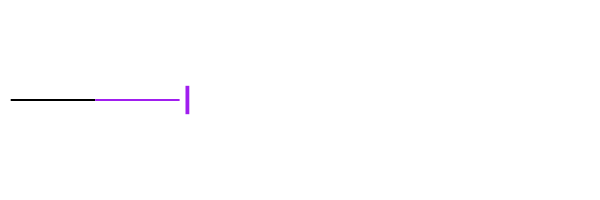

Reactant 2


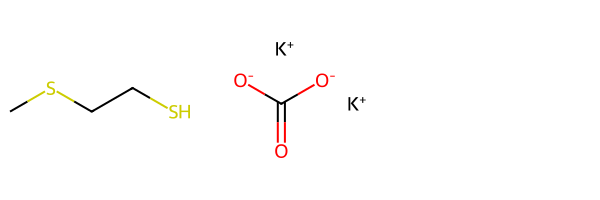

--------------------------------------
Option 2
Reactant 1


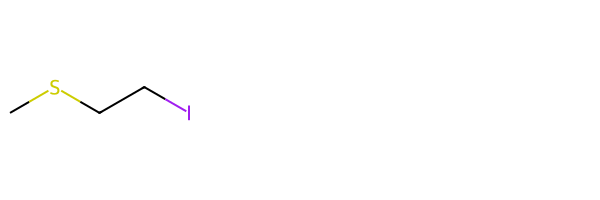

Reactant 2


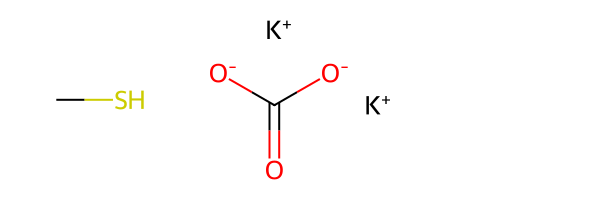

--------------------------------------
--------------------------------------


[1,

In [26]:
C_S_disconnection(mol_complicated) #The function is performed.

Finally, 3 tests are used for this function. In the first one, the C(sp3)-S bond is absent.

In [27]:
mol = Chem.MolFromSmiles('CCC') #Defines to molecule to be analyzed, using its SMILES representation and converts it to a Mol object
assert C_S_disconnection(mol) == [0] # The output value is tested

In the second one, the value input value is not of Mol type.

In [28]:
import pytest

mol = 'Ups'
with pytest.raises(TypeError):
    C_S_disconnection(mol)

In the last one, the input molecule contains the C(sp3)-S bond, and it is tested if the SMILES of the expected reactants are found in the list of the SMILES of the output molecules

C(sp3)-S disconection available
--------------------------------------
Option 1
Reactant 1


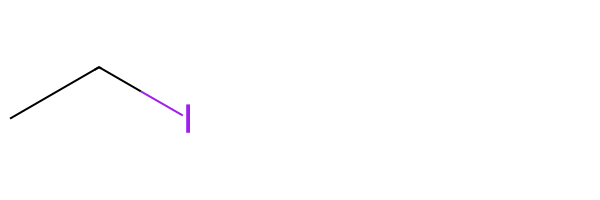

Reactant 2


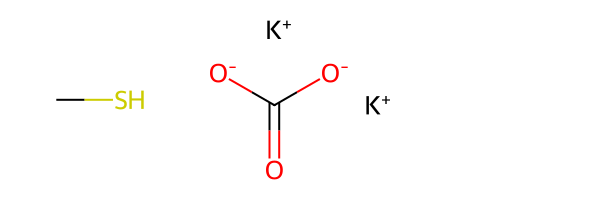

--------------------------------------
Option 2
Reactant 1


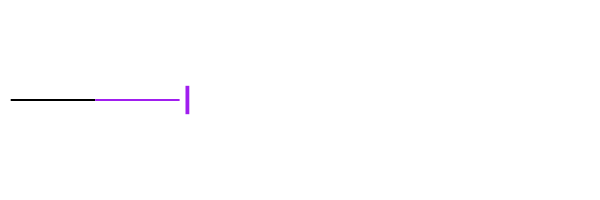

Reactant 2


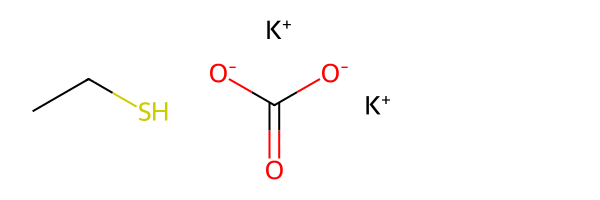

--------------------------------------
--------------------------------------


In [29]:
mol = Chem.MolFromSmiles('CSCC') #Defines to molecule to be analyzed, using its SMILES representation and converts it to a Mol object
reactant_list = C_S_disconnection(mol)[1]
smiles_list = [Chem.MolToSmiles(reactant) for reactant in reactant_list] #The list of reactants is transformed in a list corresponding to their SMILES
#It is checked if each smiles that should appear in the list of smiles indeed appears
assert Chem.MolToSmiles(Chem.MolFromSmiles('CI')) in smiles_list
assert Chem.MolToSmiles(Chem.MolFromSmiles('CCI')) in smiles_list
assert Chem.MolToSmiles(Chem.MolFromSmiles('CS')) in smiles_list
assert Chem.MolToSmiles(Chem.MolFromSmiles('CCS')) in smiles_list
assert Chem.MolToSmiles(Chem.MolFromSmiles('C(=O)([O-])[O-].[K+].[K+]')) in smiles_list

As no error was signaled, all the tests were sucessful.

Using the principle used described in this part, functions for other chemical bonds or patterns were created in the same way. The function **unique_list_reactants** was always of great importance, as it permitted returning unique reactants. Each reactive site is treated separately, implying disconnection of only one reactive site at a time. Thus, the disconnection of each reactive site is presented as a different option. Also, in order to test the functions, the same 3 scenarios were evaluated using the same logic as for the tests of the C_S_disconnection

## Functions Corresponding to Different Molecular Patterns

The functions created correspond to functional groups or molecular patterns that are very frequently encountered in organic molecules, such as carboxylic acid derrivatives, ethers, 1,2-aminoalcohols, amines, aldehydes, alcohols, alcohols that contain a beta double or triple bond, alpha-beta unsaturated carbonyl compounds and 1,3-dicarbonyl compounds alkylated carbonyl compounds.

### Function for Disconnecting Esters

The function that disconnects esters is called ester_disconnection, and gives as reactants a carboxylic acid and an alcohol. A strong acid, denoted as a proton is also displayed. The carboxylic acid and the alcohol react in the presence of the catalyst in order to give the ester, according to the Fischer esterification reaction. This functionality is presented in the cell below.

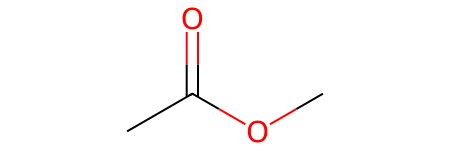

In [30]:
ester_smiles = 'CC(=O)OC' #Defines to molecule to be analyzed, using its SMILES representation
ester = Chem.MolFromSmiles(ester_smiles) #The Mol object is created from the SMILES representation
display(ester) #The ester, methyl acetate is displayed

Ester disconnection available
--------------------------------------
Option 1
Reactant 1


[15:24:16] WARNING: not removing hydrogen atom without neighbors


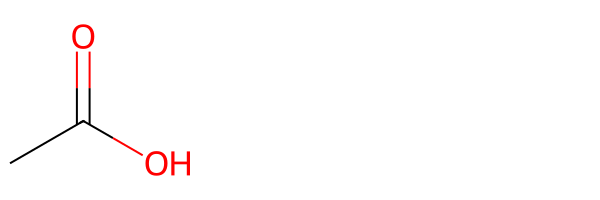

Reactant 2


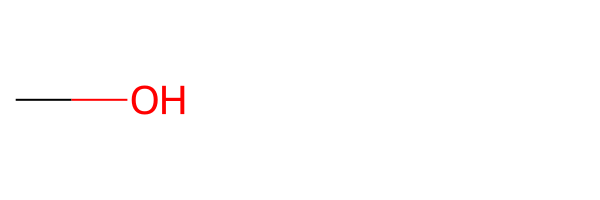

Catalyst


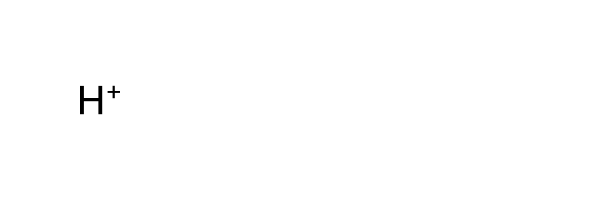

--------------------------------------
--------------------------------------


[1,

In [31]:
from chemicalbd.bond_disconnector import ester_disconnection
ester_disconnection(ester) #The function corresponding to the ester disconnection is run

The expected reactants: acetic acid and methanol, with a strong acid as a catalyst are displayed. Also, a list containing as a first element 1 (signifying that an ester disconnection was found) and a list of Mol objects (corresponding to the displayed molecules) is returned.

### Function for Disconnecting Aldehydes

The function that disconnects aldehydes is called swern_oxidation. The name comes from the named reaction that is used to generate the aldehyde from the oxidation of a primary alcohol. This method was chosen as the Swern Oxidation is a reaction that offers a good chemoselectivity, oxidizing selectively primary alcohols to the corresponding aldehyde.

The functionality can be demonstrated by taking the example of succinaldehyde, which is displayed below.

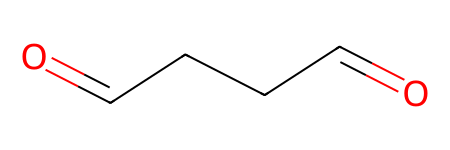

In [4]:
aldehyde_smiles = 'O=CCCC=O' #Defines to molecule to be analyzed, using its SMILES representation
aldehyde = Chem.MolFromSmiles(aldehyde_smiles) #The Mol object is created from the SMILES representation
display(aldehyde) #The dialdehyde, succinaldehyde, is displayed

Aldehyde disconnection spotted
--------------------------------------
Option 1
Reactants


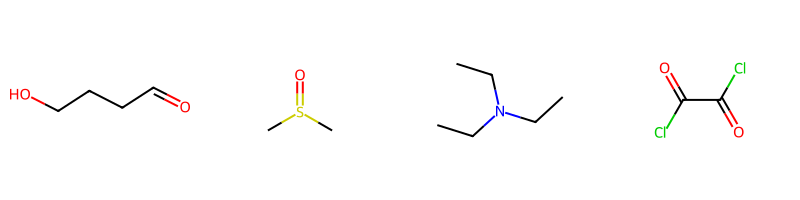

--------------------------------------
--------------------------------------


[1,

In [5]:
from chemicalbd.bond_disconnector import swern_oxidation
swern_oxidation (aldehyde) #The function disconnecting the aldehyde is run

As expected, only one option is returned as the molecule is symmetric. The reactants displayed are the corresponding primary alcohol, dimethylsulfoxide (DMSO), triethylamine (Et3N) and oxalyl chloride.

### Function that Disconnects Ethers

The function that disconnects ethers if called C_O_disconnections. A C(sp3)-O bond is disonnected into an alkyl iodide and an alcohol in the presence of sodium hydroxide. The two reactants give a classical SN2 reaction in order to obtain the ether (known as Williamson ether synthesis). The functionality may be observed in the cell below.

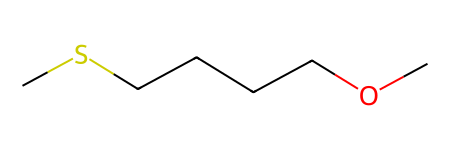

In [12]:
ether_smiles = 'CSCCCCOC' #Define the SMILES of the ether
ether = Chem.MolFromSmiles(ether_smiles) #Transforms the SMILES into a Mol object
display (ether)

Option 1
Reactant 1


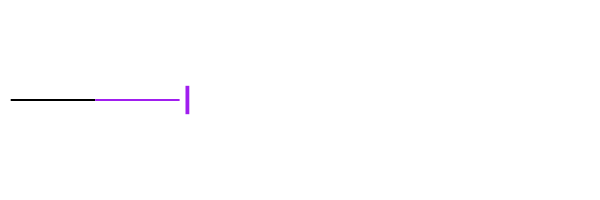

Reactant 2


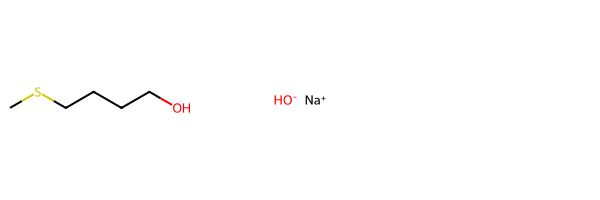

--------------------------------------
Option 2
Reactant 1


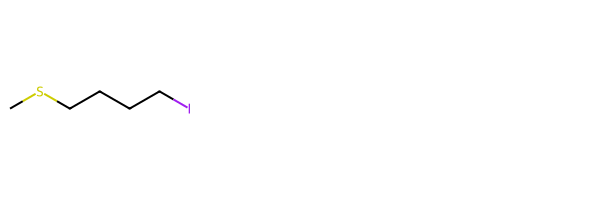

Reactant 2


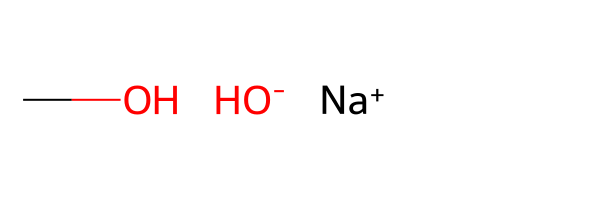

--------------------------------------
--------------------------------------


[1,

In [13]:
from chemicalbd.bond_disconnector import C_O_disconnection
C_O_disconnection (ether)

The function returns the two options expected, and it also doesn't take into accound the other functional group present in the molecule, the thiol, as C_O_disconnection should only identify ethers.

### Function that Disconnects Amides

The function that disconnects amides is called amide_disconnection. The amide is disconnected into an amine and an acyl chloride. Also, this reaction is more efficient in the presence of a weak base catalyst, such as pyridine. An example for this function is presented below.

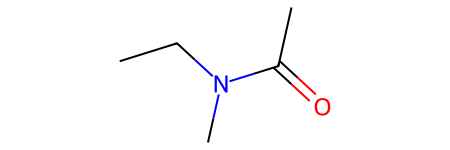

In [27]:
amide_smiles = 'CC(=O)N(CC)C' #SMILES of an amide
amide = Chem.MolFromSmiles(amide_smiles) #The SMILES string is transformed in a Mol object
display(amide) #The example molecule is displayed

Amide disconnection available
--------------------------------------
Option 1
Reactant 1


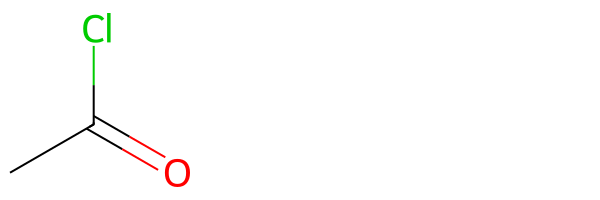

Reactant 2


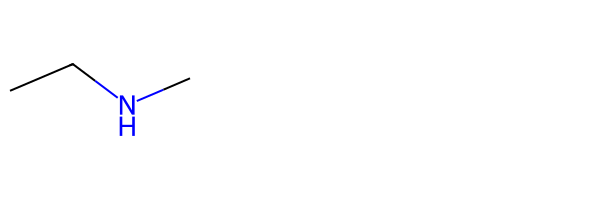

Catalyst


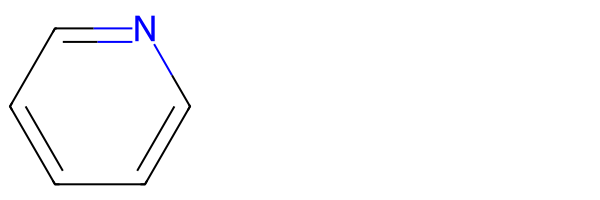

--------------------------------------
--------------------------------------


[1,

In [28]:
from chemicalbd.bond_disconnector import amide_disconnection
amide_disconnection (amide)

The function returns the expected reactants, together with the pyridine catalyst.

### Function that Disconnects Acyl Chlorides

The function that disconnects acyl chlorided is called acyl_chloride_disconnection. The compound is disconnected into a carboxylic acid and thionyl chloride. The functionality is shown below.

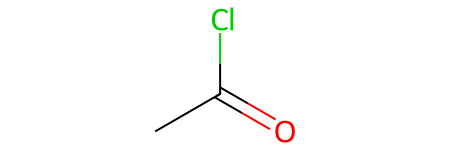

In [30]:
acyl_chloride_smiles = 'CC(=O)Cl' #The SMILES of an acid chloride is defined
acyl_chloride = Chem.MolFromSmiles(acyl_chloride_smiles) #The SMILES string is transformed into a Mol object
display(acyl_chloride) # The example is displayed

Acyl chloride disconnection available
--------------------------------------
Option 1
Reactant 1


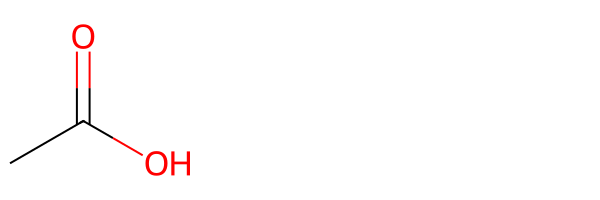

Reactant 2


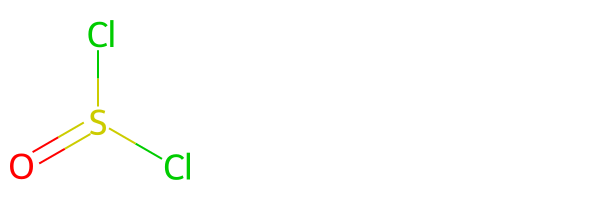

--------------------------------------
--------------------------------------


[1,

In [31]:
from chemicalbd.bond_disconnector import acyl_chloride_disconnection
acyl_chloride_disconnection(acyl_chloride)

The reactants returned as acetic acid and acyl chloride as expected.

### Function that Disconnects 1,2-aminoalcohols 

The function that disconnects this molecular pattern is called amino_alcohol_1_2. The pattern is disconnected into an expoxide and an amine in the presence of sodium amide. The functionality is shown in the cells below.

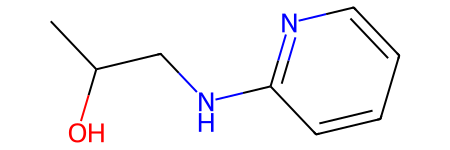

In [33]:
a_alcohol = 'CC(O)CNc1ncccc1' #The SMILES for the example molecule is defined
a_alcohol = Chem.MolFromSmiles(a_alcohol) #The SMILES string is transformed into a mol object
display(a_alcohol) #The mol object is displayed

1,2 amino-alcohol disconnection
--------------------------------------
Option 1
Reactant 1


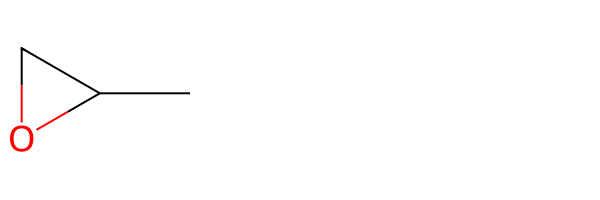

Reactant 2


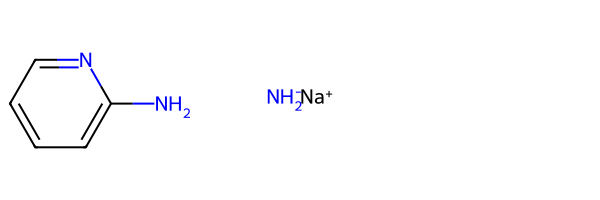

--------------------------------------
--------------------------------------


[1,

In [34]:
from chemicalbd.bond_disconnector import amino_alcohol_1_2
amino_alcohol_1_2 (a_alcohol)

The expected reactants are returned. As the amine is deprotonated by the sodium amide, it will attack in a SN2 manner the less substituted end of the epoxide. The reaction stops at a single alkylation of the amine as the resulting product is less nucleophilic than the starting material.

### Function that Disconnects Alcohols

The function that disconnects alcohols is called grignard. This comes from the name of the Grignard reaction. According to it, alcohols can be synthetized from carbonyl compounds and organomagnesian compounds. A non-protic solvent, such as THF, needs to be used in this reaction, as organomagnesian compounds are very basic. The functionality can be observed below.

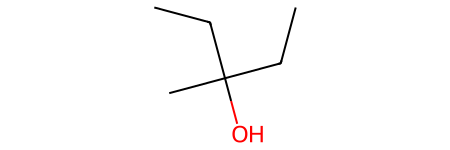

In [35]:
alcohol_smiles = 'CCC(CC)(C)O' #The SMILES of the example molecule is defined
alcohol = Chem.MolFromSmiles(alcohol_smiles) #The SMILE string is transformed into a Mol object
display (alcohol)

Grignard disconnection available
--------------------------------------
Option 1
Reactant 1


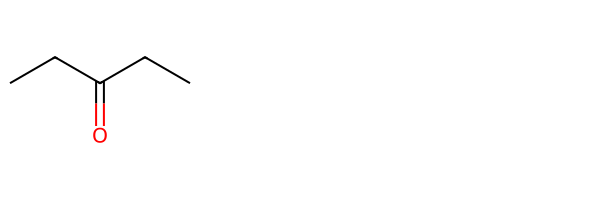

Reactant 2


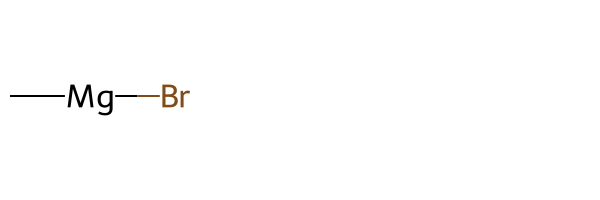

Solvent


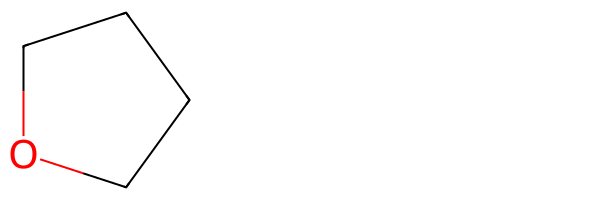

--------------------------------------
Option 2
Reactant 1


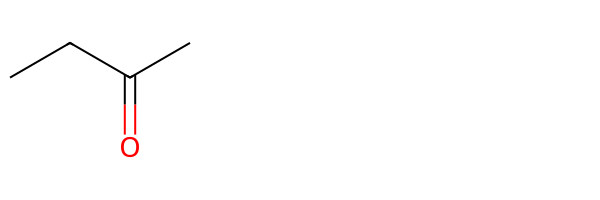

Reactant 2


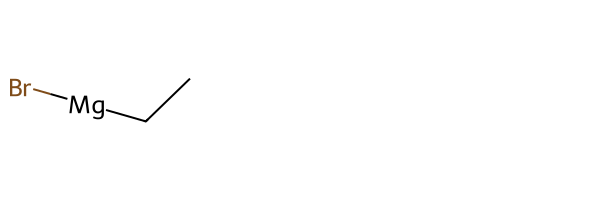

Solvent


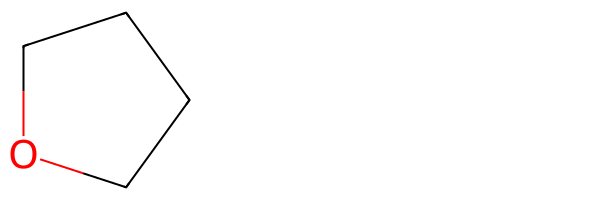

--------------------------------------
--------------------------------------


[1,

In [36]:
from chemicalbd.bond_disconnector import grignard
grignard (alcohol)

The expected reactants are returned. Moreover, it may be observed how the function takes into account the symmetry of the molecule.

### Function that Disconnects Alcohols Containing Triple Bonds in their Beta Position

Molecules that contain the pattern: alcohol together with a triple bond in the beta position may be disconnected giving the following reactants: an epoxide, and a terminal alkyne in the presence of a moderately strong base, such as sodium amide. The reactants give a classical SN2 reaction that form the target molecule.

This functionality may be shown by taking as an example the molecule displayed below.

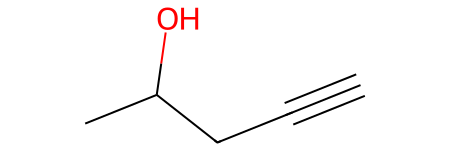

In [6]:
example_smiles = 'OC(C)CC#C' #Defines to molecule to be analyzed, using its SMILES representation
example = Chem.MolFromSmiles(example_smiles) #The Mol object is created from the SMILES representation
display(example) #The compound containing the alcohol and the triple bond in the beta position is displayed

Primary alcohol with beta alkyne disconnection available
--------------------------------------
Option 1
Reactant 1


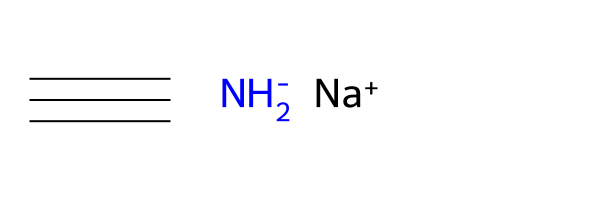

Reactant 2


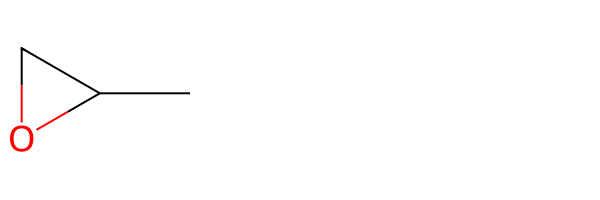

--------------------------------------
--------------------------------------


[1,

In [7]:
from chemicalbd.bond_disconnector import alcohol_beta_triple_bond
alcohol_beta_triple_bond (example) #The function disconnecting the pattern is run

The expected reactants are returned: acetylene in the presence of the amide and a methyl substituted epoxide

Another example may be analyzed, the one in which also the alpha carbon with respect to the triple bond is subtituted.

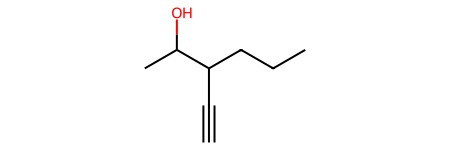

In [8]:
example_smiles_new = 'OC(C)C(CCC)C#C' #Defines to molecule to be analyzed, using its SMILES representation
example_new = Chem.MolFromSmiles(example_smiles_new) #The Mol object is created from the SMILES representation
display(example_new) #The compound containing the alcohol and the triple bond in the beta position is displayed

In [9]:
alcohol_beta_triple_bond (example_new) #The function disconnecting the pattern is run

[0]

This result may seem surprising, as the pattern is contained in the molecule. However, the reaction used to make such compounds is effective and chemoselective if none of the two carbon atoms between the triple bond, or maximum the one next to the hydroxyl is subsituted. This is because the terminal deprotonated alkyne will open the epoxide preferrentially on the less subtituted side.

In order to synthetize the molecule shown in the above example, the epoxide displayed below would be needed.

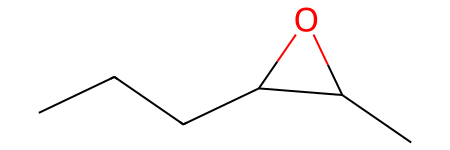

In [38]:
epoxide_needed = Chem.MolFromSmiles('CCCC1C(C)O1') #Creates a mol object from the SMILES of the epoxide
display(epoxide_needed) #The epoxide is displayed

As it may be observed, this epoxide is substituted on both sides, and therefore the reaction with the alkyne is not chemoselective.

The pattern that was given in the function to be searched is '[C]#[C][CH2][C^3][OH]'. It was thus specifically stated that the carbon next to the triple bond needs to be non-substituted, so that the reaction given by the displayed molecules is chemoselective. 

This is why, in the previous example, the function did not return any reactant.

### Function that Disconnects Alcohols Containing Double Bonds in their Beta Position

This function is very similar to the one containing triple bonds instead of double bonds. This is because the first step of the synthesis is the same as before. Nonetheless, what was before a target molecule is now just a synthesis intermediate, which needs to be hydrogenated in order to obtain the target moleucule. This is thus the first function that displays and returns not only the reactants needed, but also a synthesis intermediate.

Afterwards, the hydrogenation conditions are also displayed and returned. Two possibilities are given, depending on weather the (Z) or (E) isomer of the double bond is desired.

This functionality may be shown by taking as an example the molecule displayed below.

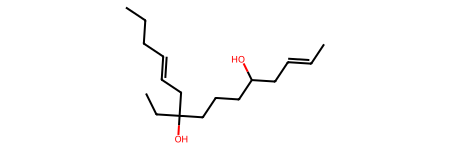

In [10]:
example_alcohol_db_smiles = 'CC=CCC(O)CCCC(O)(CC)CC=CCCC' #Defines to molecule to be analyzed, using its SMILES representation
alcohol_db = Chem.MolFromSmiles(example_alcohol_db_smiles) #The Mol object is created from the SMILES representation
display(alcohol_db) #The compound containing the alcohol and the double bond in the beta position is displayed

Primary alcohol with beta alkene disconnection available
--------------------------------------
Option 1
Reactant 1


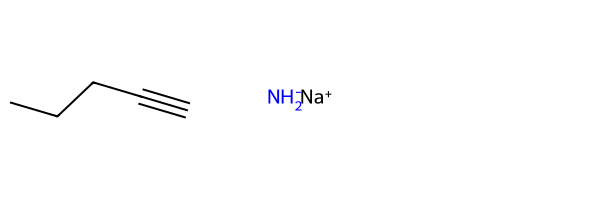

Reactant 2


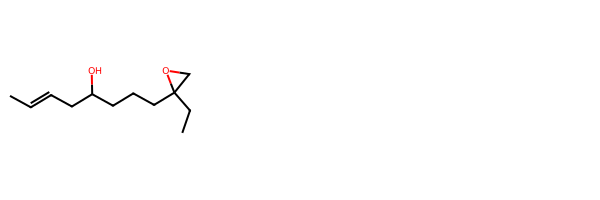

Once this two are combined, the following product is obtained


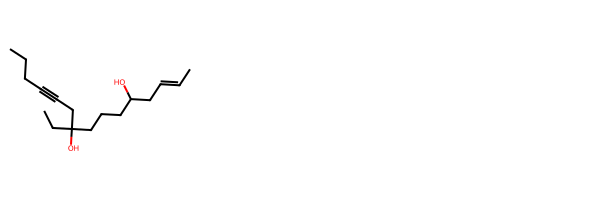

The product needs to be hydrogenated in order to get to the target molecule
If the Z geometry is needed for the double bond, then the following conditions, known as hydrogen on Lindlar catalyst, are employed


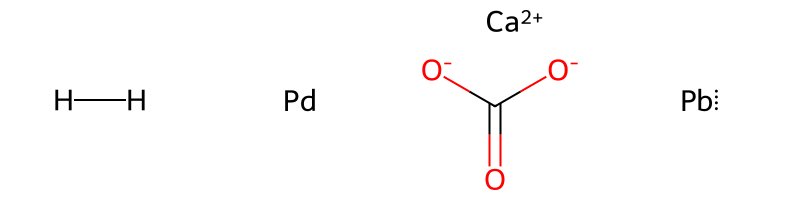

If the E geometry is needed for the double bond, then the following conditions are employed


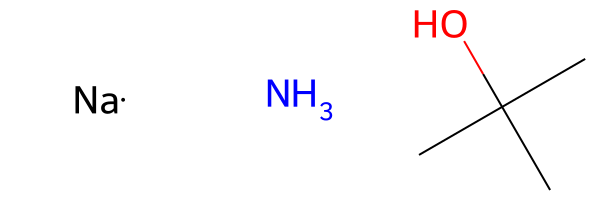

--------------------------------------
Option 2
Reactant 1


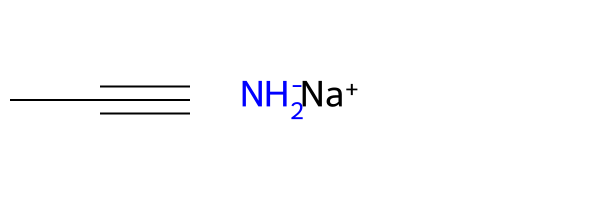

Reactant 2


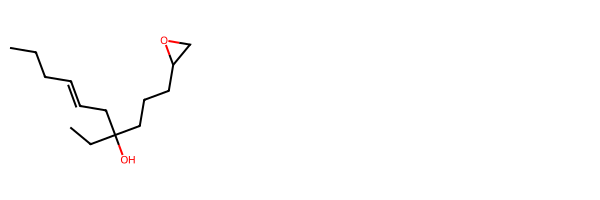

Once this two are combined, the following product is obtained


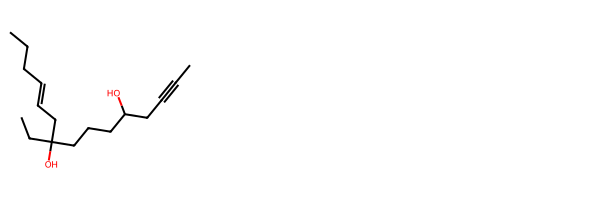

The product needs to be hydrogenated in order to get to the target molecule
If the Z geometry is needed for the double bond, then the following conditions, known as hydrogen on Lindlar catalyst, are employed


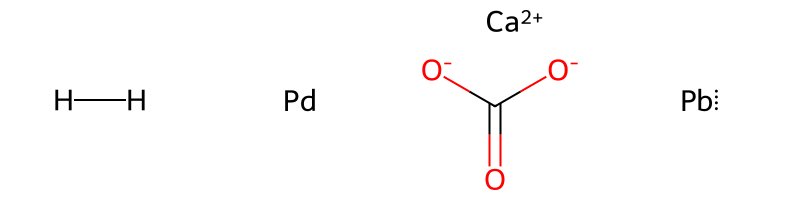

If the E geometry is needed for the double bond, then the following conditions are employed


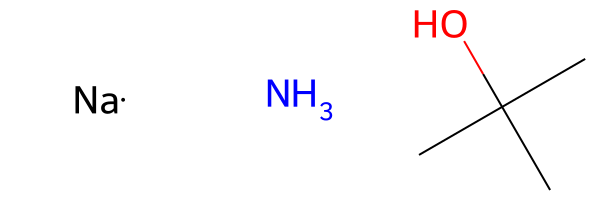

--------------------------------------
--------------------------------------


[1,

In [11]:
from chemicalbd.bond_disconnector import alcohol_beta_double_bond
alcohol_beta_double_bond(alcohol_db) #The function disconnecting the pattern is run

The reactants expected, the intermediates and the hydrogenation conditions are returned, for each of the two reactive sites.

One peculiar thing is related to the 3 unpaired electrons when the lead atom is displayed. This is due to the display settings of rdkit.

### Amine Disconnection

Synthesis of amines can pose a problem in organic chemistry, as it can't be achieved chemoselectively by a simple alkylation. This is due to the fact that usually during the alkylayion between an amine and an alkyl halide, the amine will akylate up to the point where it is tetrasubstituted, and thus a mixture of products will be obtained.

A reliable way to synthetize amine is the following: the nitrogen atom resulted from the disconnection of the amine may react with an acyl chloride instead of an alkyl chloride. This reaction is known to stop at a single acylation (due to the deolcalization of the lone electron pair of the N atom). Once this reaction intermediate is formed, it can be reduced with lithium aluminium hydride in order to give the desired amine. This is what the function amine_disconnection does, as it may be seen below.

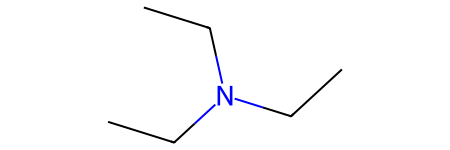

In [37]:
amine_smiles = 'CCN(CC)CC' #The SMILES string of the amine is defined
amine = Chem.MolFromSmiles(amine_smiles)
display (amine)

Amine disconnection available
--------------------------------------
Option 1
Reactant 1


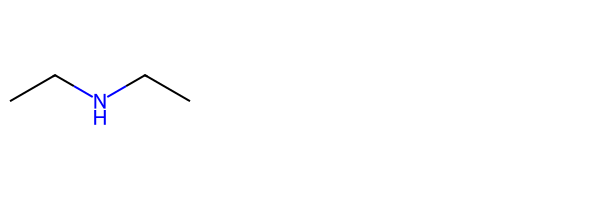

Reactant 2


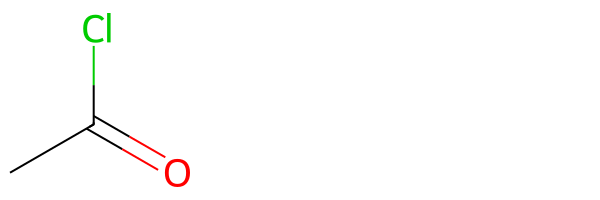

Catalyst


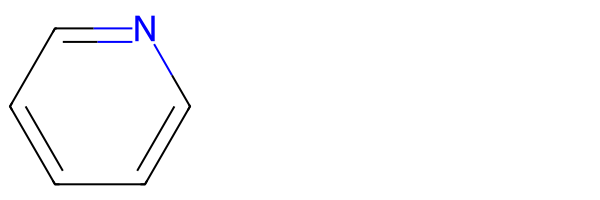

Once combined, the reactants give the following intermediate


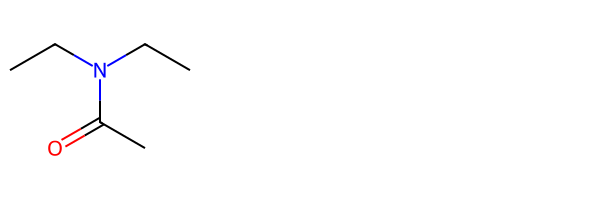

This intermediate needs to be reduced in order to obtain the target molecule. The following reducing agent could be used:


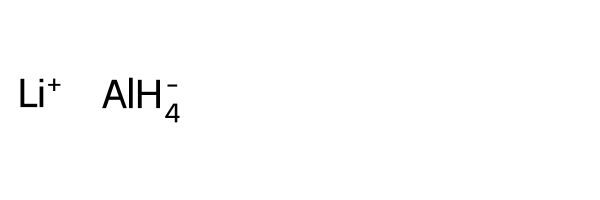

--------------------------------------
--------------------------------------


[1,

In [38]:
from chemicalbd.bond_disconnector import amine_disconnection
amine_disconnection (amine)

The expected reactants are returned, together with amide intermediate.

### Disconnection of 1,3-dicarbonyl Pattern

This pattern can be disconnected into a carbonyl compounds and an acyl chloride. The carbonyl compound can be condensed with an amine in order to form an enamine (in situ), which will react with the acyl chloride in mild conditions in order to form a reaction intermediate. This reaction intermediate can be hydrolysed in order to give the target molecule.

This is what the function dicarbonyl_1_3 does, as illustrated in the cells below.

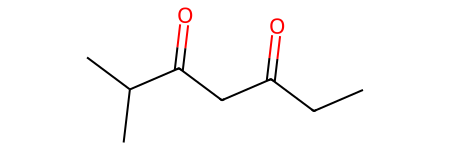

In [41]:
dicarbonyl_smiles = 'CC(C)C(=O)CC(=O)CC' #The SMILES of a 1,3 dicarbonyl is defined
dicarbonyl = Chem.MolFromSmiles(dicarbonyl_smiles) #The SMILES string is transformed into a Mol object
display(dicarbonyl) #The molecule is displayed

1,3 dicarbonyl disconnection available
--------------------------------------
Option 1
Reactant 1


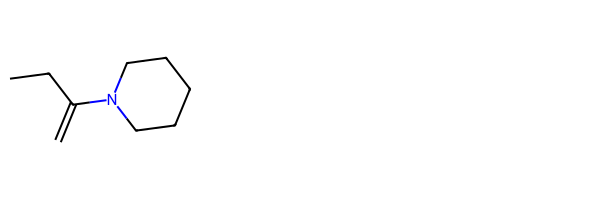

Reactant 1 could be obtained from the following reactants


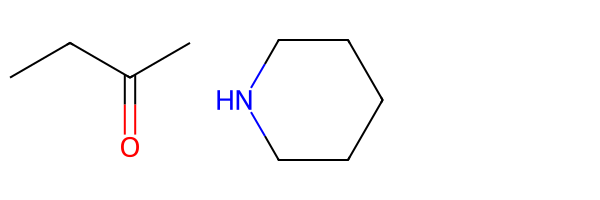

Reactant 2


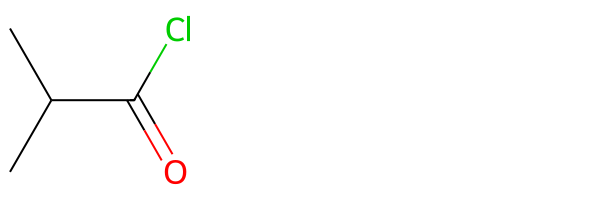

Once combined, the reactants give the following intermediate


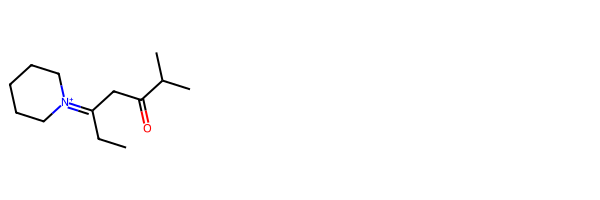

This intermediate needs to be hydrolyzed in mild acidic environment to give the target molecule
--------------------------------------
Option 2
Reactant 1


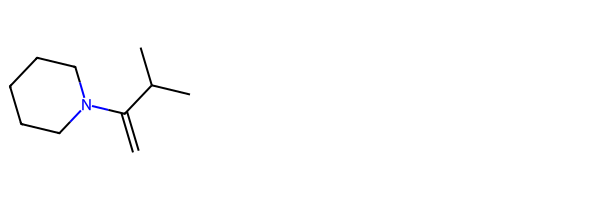

Reactant 1 could be obtained from the following reactants


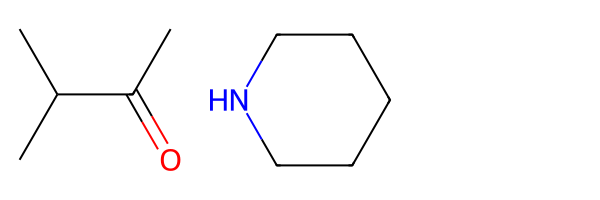

Reactant 2


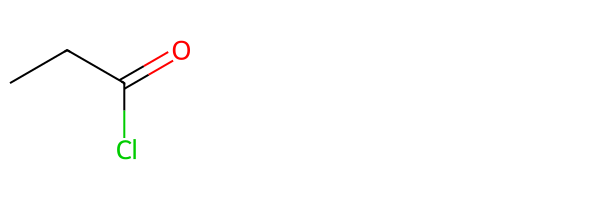

Once combined, the reactants give the following intermediate


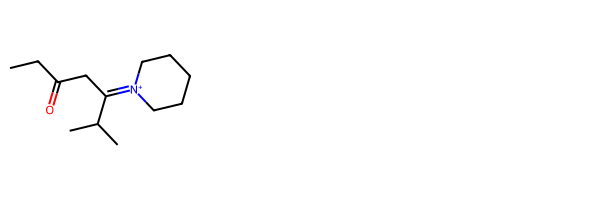

This intermediate needs to be hydrolyzed in mild acidic environment to give the target molecule
--------------------------------------
--------------------------------------


[1,

In [40]:
from chemicalbd.bond_disconnector import dicarbonyl_1_3
dicarbonyl_1_3(dicarbonyl)

The reactants expected are returned. Nonetheless, here, one limitation of the module may be observed: in the condensation between the carbonyl compound and the amine, the enamine with the double bond on the other side of the molecule is more stable in both options presented. Thus, in none of them is reactant 1 formed as a pure compound. A mixture of condensation compound is obtained, and reactant 1 represents the minor component of the mixture.

### Disconnection of Alpha-Beta unsaturated Carbonyl Compounds

Alpha-beta unsaturated carbonyl compounds can be made from the aldol reaction of two carbonyls. In order to increase as much as possible the chemoselectivity of the reaction, the two carbonyls are not mixed together with a base. Rather, one carbonyl is mixed with trimethylsilyl-chloride in order to form a silyl-enol, which can then react with the other carbonyl compound in a reaction catalyzed by TiCl4. A reaction intermediate than can be hydrloyzed in order to give the desired compound is obtained.

This disconnection is done by the function aldol, as is presented in the cells below.

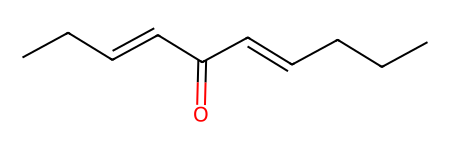

In [43]:
unsat_carbonyl_smiles = 'CCC=CC(=O)C=CCCC' #The SMILES string of an alpha beta unsaturated ketone is defined
unsat_carbonyl = Chem.MolFromSmiles(unsat_carbonyl_smiles) #The SMILES string is transformed into a mol object
display (unsat_carbonyl) #The molecule is displayed

Disconnection specific to aldol reaction available
--------------------------------------
Option 1
Reactant 1


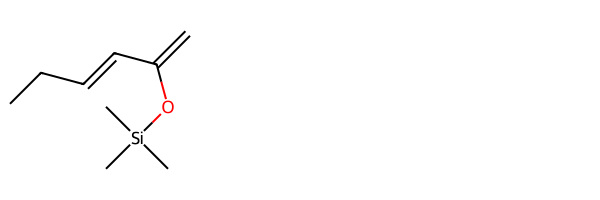

Reactant 1 could be obtained from the following reactants


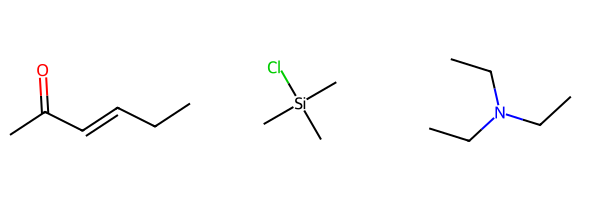

Reactant 2


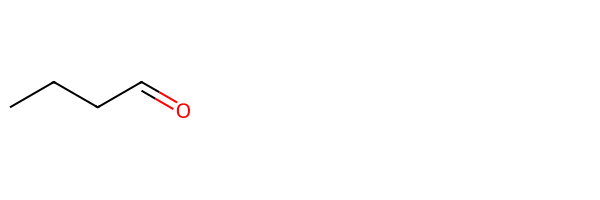

Catalyst


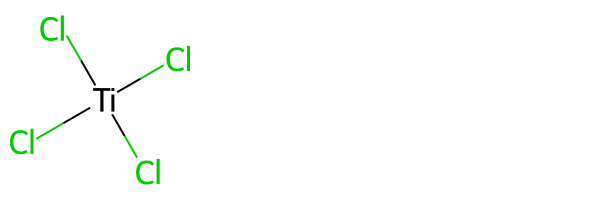

Once combined, the reactants give the following intermediate


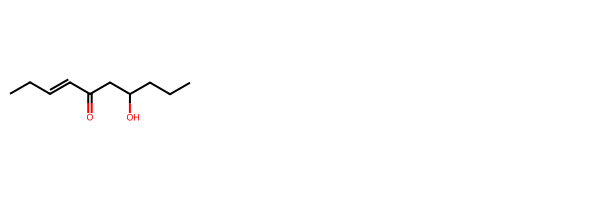

This intermediate needs to be dehydrated in acidic environment to give the target molecule
--------------------------------------
Option 2
Reactant 1


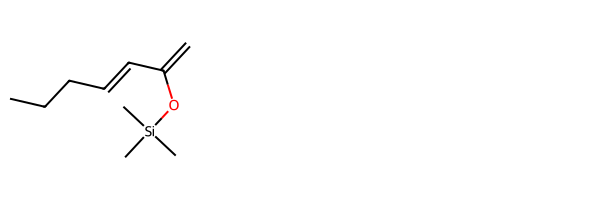

Reactant 1 could be obtained from the following reactants


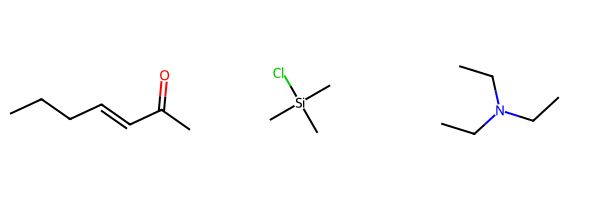

Reactant 2


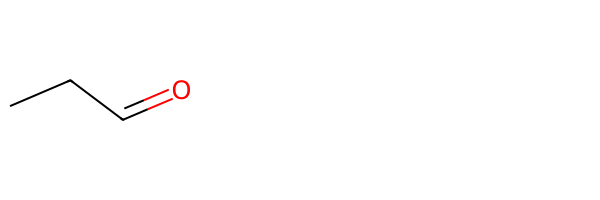

Catalyst


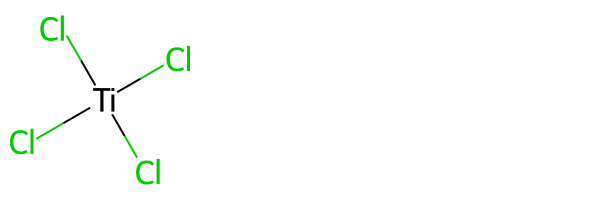

Once combined, the reactants give the following intermediate


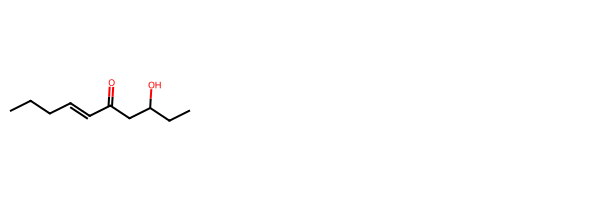

This intermediate needs to be dehydrated in acidic environment to give the target molecule
--------------------------------------
--------------------------------------


[1,

In [44]:
from chemicalbd.bond_disconnector import aldol
aldol (unsat_carbonyl)

The expected reactants are obtained for both disconnection options.

### Disconnection of Alpha Alkylated Carbonyl Compounds

The function that disconnects this pattern is called alpha_carbonyl_alkylation, and is the most complex function from the package. This is because there are 3 types of alpha alkylated carbonyl compounds. For each type, a different reaction is used for the alkylation in order to give good chemoselectivity. Thus, the function alpha_carbonyl_alkylation contains 3 subfunctions. In the begining, it is searched if the compounds contains either type of substituted alpha carbonyl carbon, by searching for the pattern SMARTS pattern [O]=[C][C^3][C^3] . If so, the 3 subfunctions are applied to the compound.

The first possibility is that the function contains a dicarbonyl compound with the common alpha carbon subsituted. In this case, in order to form the target molecule, the reactants are the non-substituted dicarbonyl compound (in the presence of sodium ethoxide and ethanol) and an alkyl iodide. This is done by the subfunction alpha_dicarbonyl_alkylation, as presented in the cells below.

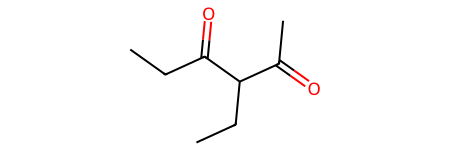

In [45]:
dicarb_subst_smiles = 'CC(=O)C(CC)C(=O)CC' #The SMILES string of the monocarbonyl compound is defined 
dicarb_subst = Chem.MolFromSmiles(dicarb_subst_smiles) #The SMILES string is transformed into a mol object
display (dicarb_subst) #The molecule is displayed

C(sp3)-C(sp3) bond disconnection available in alpha position of 1,3-dicarbonyl compound
--------------------------------------
Option 1
Reactant 1


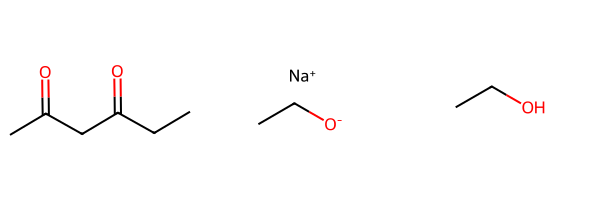

Reactant 2


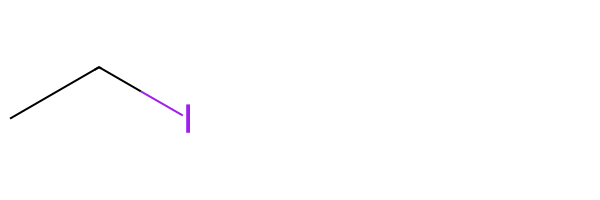

--------------------------------------
--------------------------------------


In [46]:
from chemicalbd.bond_disconnector import alpha_dicarbonyl_alkylation
alpha_dicarbonyl_alkylation (dicarb_subst)

In this case, the function doesn't return 1 any more. This is because the function alpha_carbonyl_alkylation already returns 1 if one of the three patterns of alpha carbonyl substitution is found.

The second possibility is that the alpha carbon of a monocarbonyl compound is mono/disubstituted (in this case, it is considered that the maximum subtitution of the alpha carbon is 3 not 4, as it implicitly has a bond with the carbon of the carbonyl group). In this case, the target molecule can be formed from an alkyl halide and the non-substituted carbonyl compound, but which contains an aditional ester functional group in the alpha carbon. Together with the ester, a 1,3 dicarbonyl is formed, and thus the alkylation is more chemoselective. One can then get red of the extra ester by hydrolysis and then heating the reaction intermediate. This is done by the subfunction alpha_monocarbonyl_alkylation.

The complex idea about this function is that it can't only search if the alpha carbon is subtituted. If it does so, it is possible that in fact the alpha carbon already belongs to a 1,3 dicarbonyl pattern, for which the previous reaction is employed. Therefore, this subfunction seaches also for all the possible beta carbons (multiple in the case of subtitution of the alpha carbon) and checks that they are sp3 hybridized, which eliminates the possibility of having in fact a 1,3 dicarbonyl compound. 

This subfunction works as presented in the cells below.

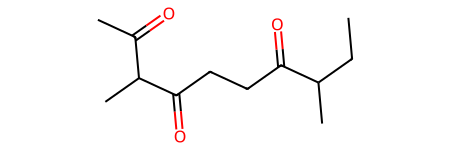

In [48]:
mono_carb_smiles = 'CCC(C)C(=O)CCC(=O)C(C)C(=O)C' #SMILES of the example molecule
mono_carb = Chem.MolFromSmiles(mono_carb_smiles) #The SMILES is trnasformed into a mol object
display (mono_carb) #The example molecule is displayed

C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (mono/disubstituted)
--------------------------------------
Option 1
Reactant 1


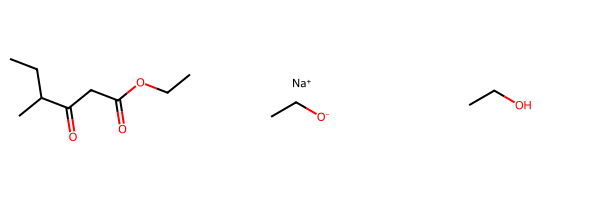

Reactant 2


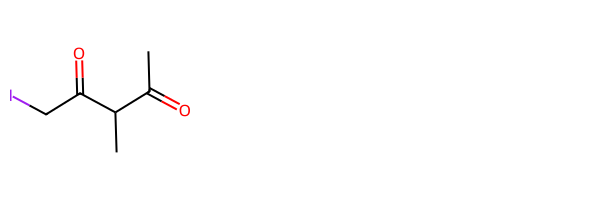

Once the two reactants are combined, the following product is obtained


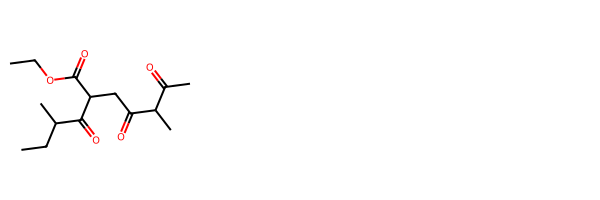

This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated in order to obtain the target molecule
--------------------------------------
--------------------------------------
Option 2
Reactant 1


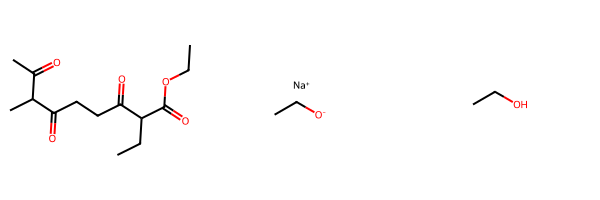

Reactant 2


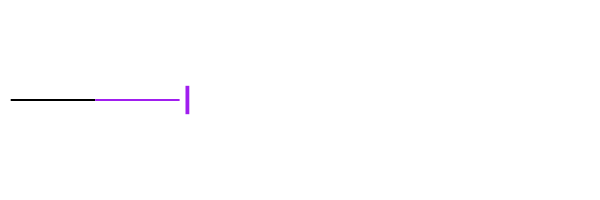

Once the two reactants are combined, the following product is obtained


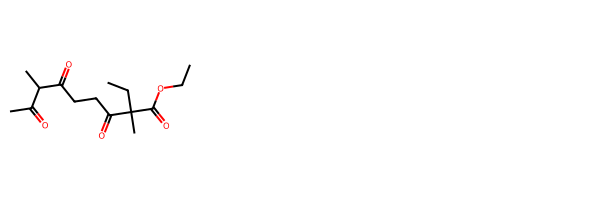

This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated in order to obtain the target molecule
--------------------------------------
Option 3
Reactant 1


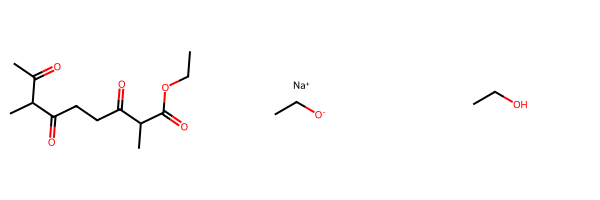

Reactant 2


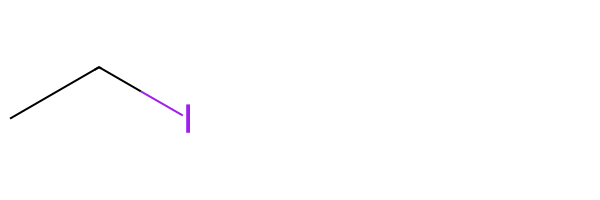

Once the two reactants are combined, the following product is obtained


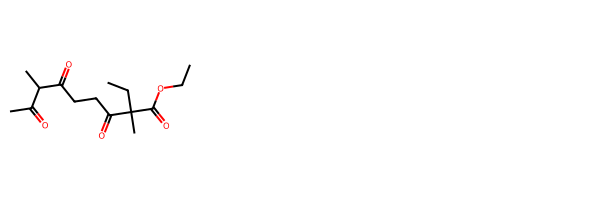

This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated in order to obtain the target molecule
--------------------------------------
--------------------------------------


In [49]:
from chemicalbd.bond_disconnector import alpha_monocarbonyl_alkylation
alpha_monocarbonyl_alkylation (mono_carb)

It may be observed that indeed, the subfunction did not recognize the subtituted 1,3 dicarbonyl compound already existing in the molecule. The reactants returned are only those speciffic to the subtituted mono-carbonyl compound.

The last possibility is having a trisubstituted carbonyl compound. In that case, the non-substitued carbonyl compound can be deprotonated using a weak base such as triethyl amine, and then alkylating with an alkyl-iodide. This reaction ca be used as the alpha carbon of the reactant already needs to be disubtituted if a trisubstituted compound is formed, and thus the high degree of subtitution encourages the amine to deprotonate in the right spot. Nevertheless, one still needs to verify also the beta carbons in order to make sure that none of them belong to a 1,3 dicarbonyl compound, case in which the reaction corresponding to the first subfunction is used.

The way of operating of the subfunction alpha_monocarbonyl_alkylation_trisubstituted is shown in the cells below.

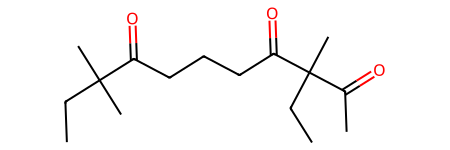

In [50]:
carb_tri_smiles = 'CC(C)(CC)C(=O)CCCC(=O)C(CC)(C)C(=O)C' #The SMILES of the example molecule is defined
carb_tri = Chem.MolFromSmiles(carb_tri_smiles) #The SMILES is transformed into a mol object
display (carb_tri)

C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (trisubstituted)
--------------------------------------
Option 1
Reactant 1


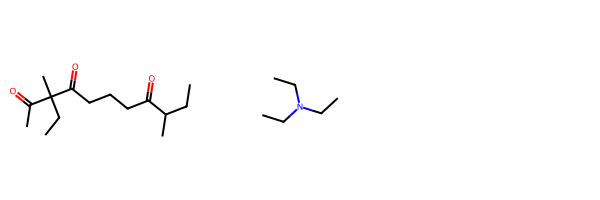

Reactant 2


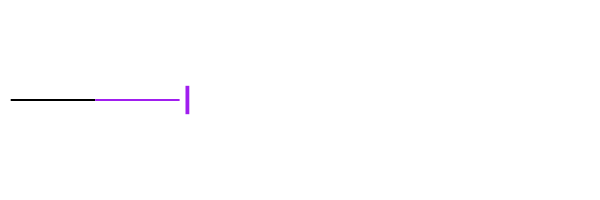

--------------------------------------
Option 2
Reactant 1


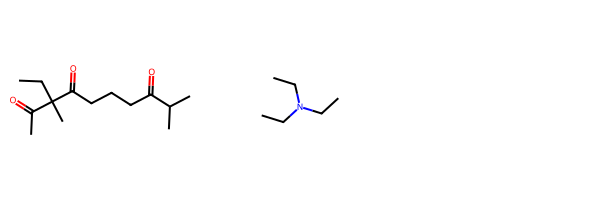

Reactant 2


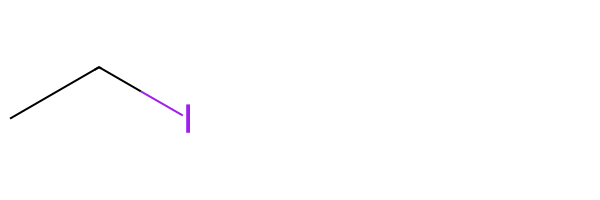

--------------------------------------
--------------------------------------


In [51]:
from chemicalbd.bond_disconnector import alpha_monocarbonyl_alkylation_trisubstituted
alpha_monocarbonyl_alkylation_trisubstituted (carb_tri)

The expected reactants are obtained, and the subfunction does not interfeere with the 1,3 dicarbonyl compound.

Now, the function alpha_carbonyl_alkylation combines all these 3 functions. The result can be seen by applying the function to the previous example molecule.

C(sp3)-C(sp3) bond disconnection available in alpha position of 1,3-dicarbonyl compound
--------------------------------------
Option 1
Reactant 1


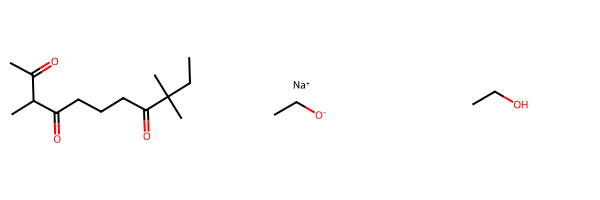

Reactant 2


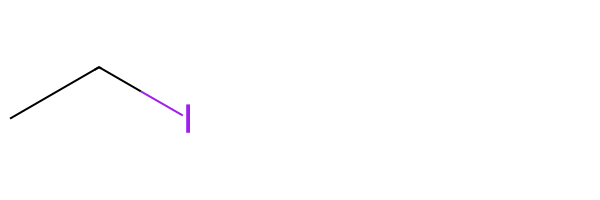

--------------------------------------
Option 2
Reactant 1


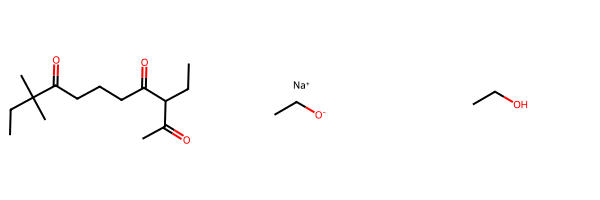

Reactant 2


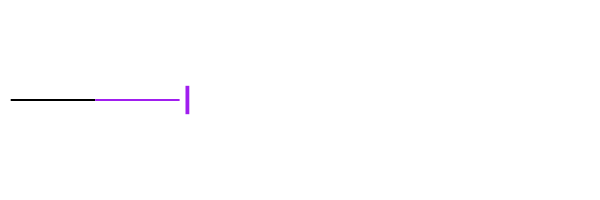

--------------------------------------
--------------------------------------
C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (mono/disubstituted)
--------------------------------------
Option 1
Reactant 1


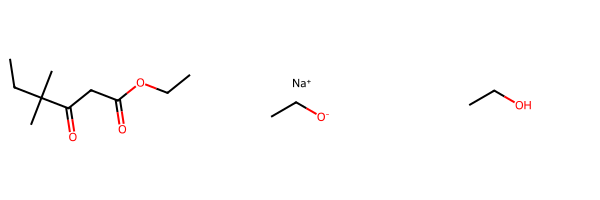

Reactant 2


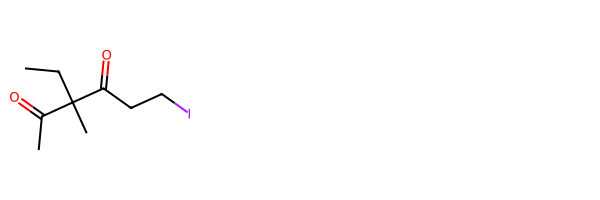

Once the two reactants are combined, the following product is obtained


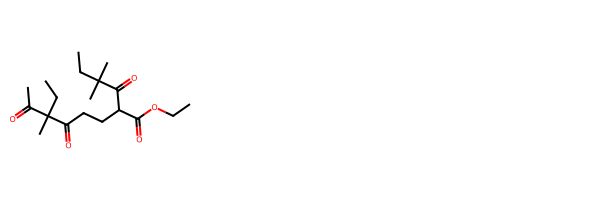

This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated in order to obtain the target molecule
--------------------------------------
--------------------------------------
C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (trisubstituted)
--------------------------------------
Option 1
Reactant 1


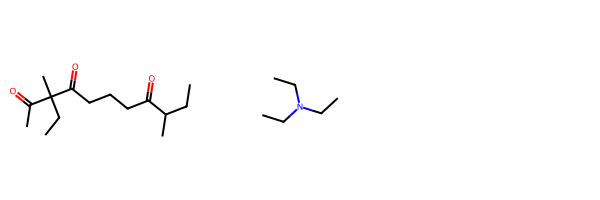

Reactant 2


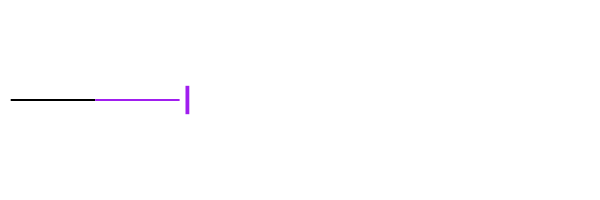

--------------------------------------
Option 2
Reactant 1


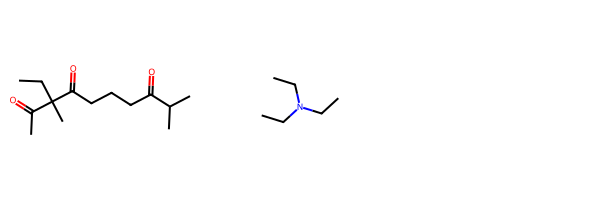

Reactant 2


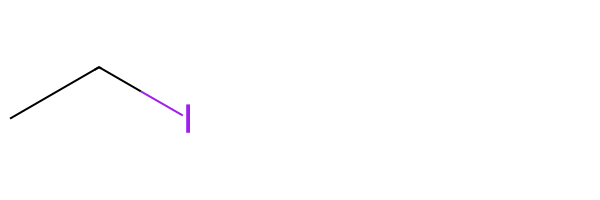

--------------------------------------
--------------------------------------


[1,
 [[<rdkit.Chem.rdchem.Mol at 0x21166eaf4c0>,

In [52]:
from chemicalbd.bond_disconnector import alpha_carbonyl_alkylation
alpha_carbonyl_alkylation (carb_tri)

All the expected reactants are returned, and the different types of reactions are applied only to their own speciffic patterns. What is also different from the other functions is the fact that the list of reactants is now returned as a nested list. Each list within the nested list corresponds to one of the 3 types of reactions.

## The Core Function : disconnections

In this function, all the known disconnections for a molecule are searched for, making it the core function of the module. It takes as input value the SMILES string of the molecule to disconnect. It applies to the molecule all the disconnection functions that were previously discussed. It returns the list of reactants, as mol objects, from which the molecule could be made.

If there are no known disconnections, a message is displayed and an empty list is returned.

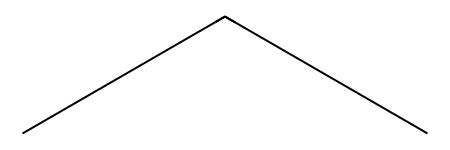

In [55]:
smiles_no_disc = 'CCC' #The SMILES of a molecule with no known disconnections is created
mol_no_disc = Chem.MolFromSmiles(smiles_no_disc) #The SMILES string is transformed into a mol object
display (mol_no_disc) # The molecule is displayed

The molecule inserted looks like this:


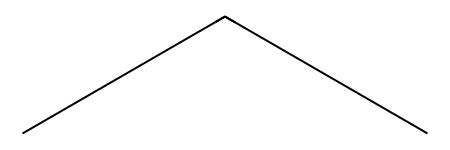

--------------------------------------
--------------------------------------
The molecule contains no known disconnections


[]

In [54]:
from chemicalbd.bond_disconnector import disconnections
disconnections (smiles_no_disc)

On the contrary, if there are known disconnections, the result is the following.

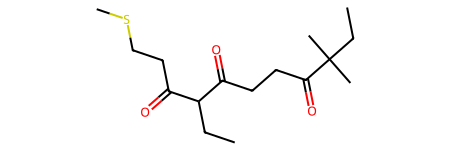

In [59]:
smiles_disc = 'CSCCC(=O)C(CC)C(=O)CCC(=O)C(C)(CC)C' #The SMILES of a molecule with known disconnections is created
mol_disc = Chem.MolFromSmiles(smiles_disc) #The SMILES string is transformed into a mol object
display (mol_disc) # The molecule is displayed

The molecule inserted looks like this:


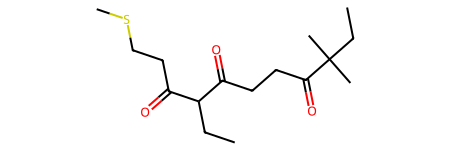

--------------------------------------
--------------------------------------
C(sp3)-S disconection available
--------------------------------------
Option 1
Reactant 1


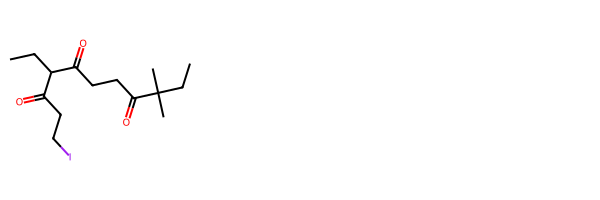

Reactant 2


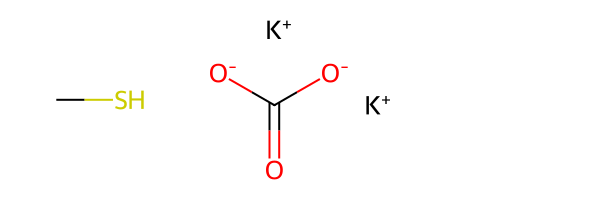

--------------------------------------
Option 2
Reactant 1


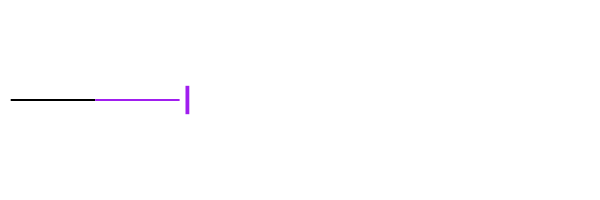

Reactant 2


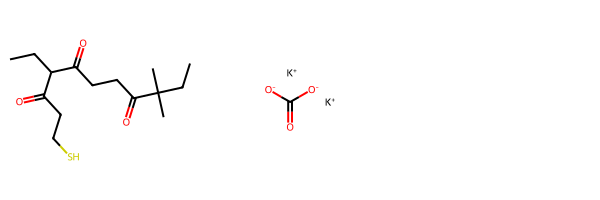

--------------------------------------
--------------------------------------
C(sp3)-C(sp3) bond disconnection available in alpha position of 1,3-dicarbonyl compound
--------------------------------------
Option 1
Reactant 1


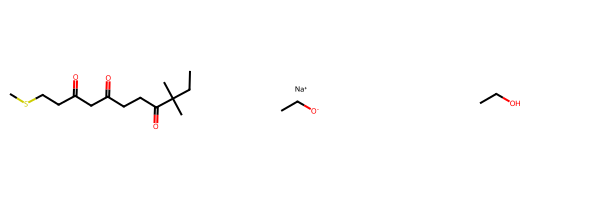

Reactant 2


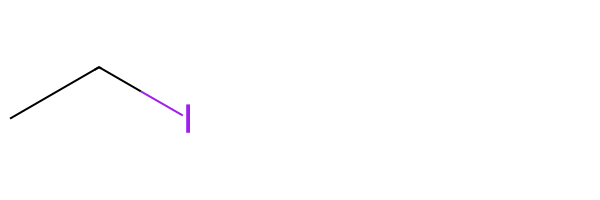

--------------------------------------
--------------------------------------
C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (mono/disubstituted)
--------------------------------------
Option 1
Reactant 1


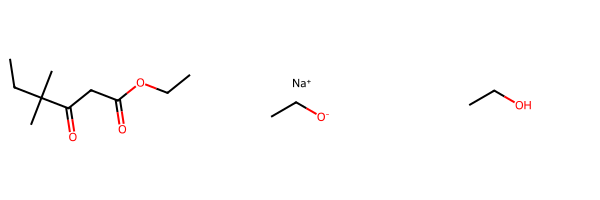

Reactant 2


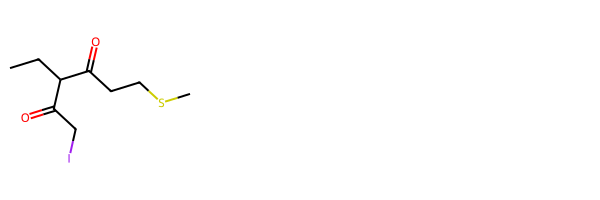

Once the two reactants are combined, the following product is obtained


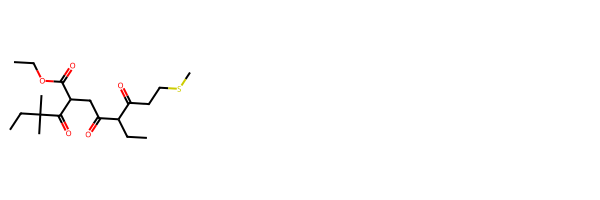

This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated in order to obtain the target molecule
--------------------------------------
--------------------------------------
C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (trisubstituted)
--------------------------------------
Option 1
Reactant 1


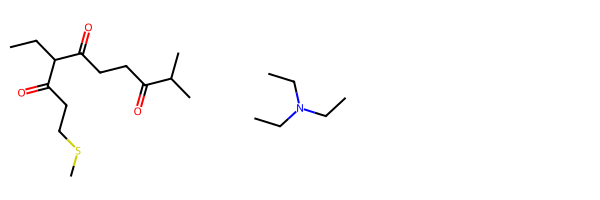

Reactant 2


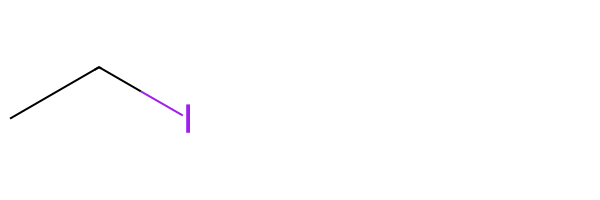

--------------------------------------
Option 2
Reactant 1


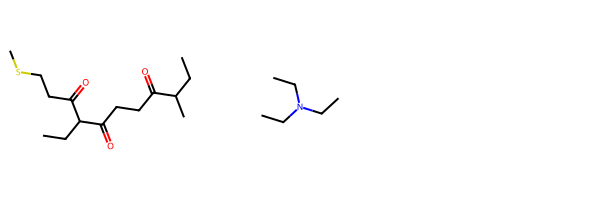

Reactant 2


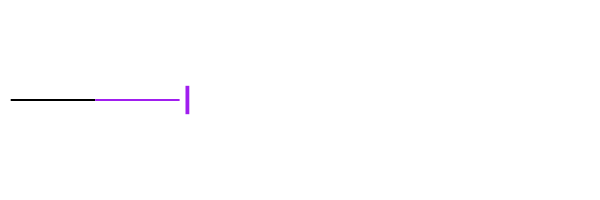

--------------------------------------
--------------------------------------
1,3 dicarbonyl disconnection available
--------------------------------------
Option 1
Reactant 1


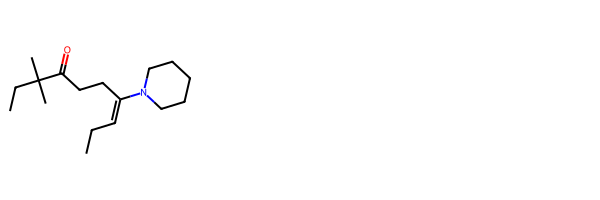

Reactant 1 could be obtained from the following reactants


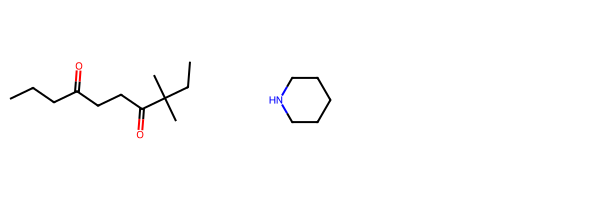

Reactant 2


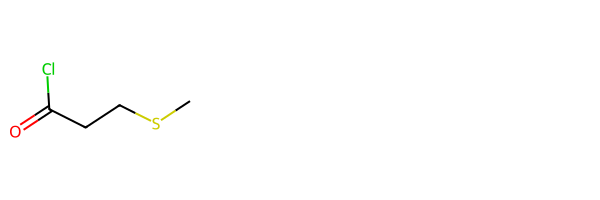

Once combined, the reactants give the following intermediate


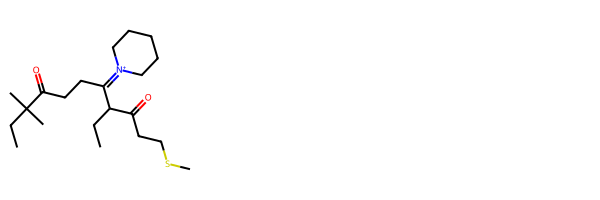

This intermediate needs to be hydrolyzed in mild acidic environment to give the target molecule
--------------------------------------
Option 2
Reactant 1


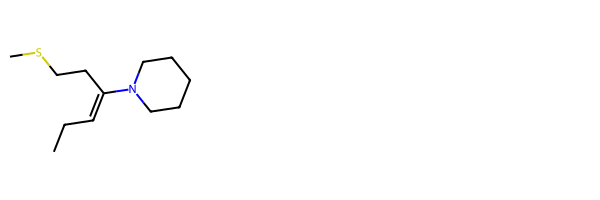

Reactant 1 could be obtained from the following reactants


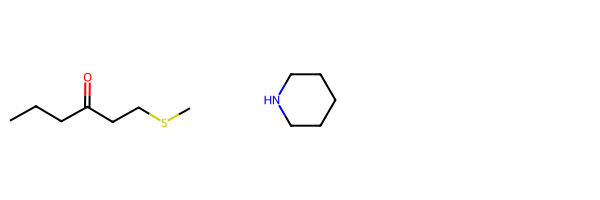

Reactant 2


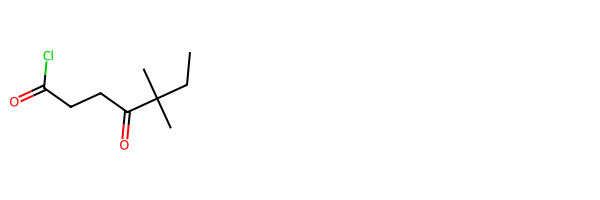

Once combined, the reactants give the following intermediate


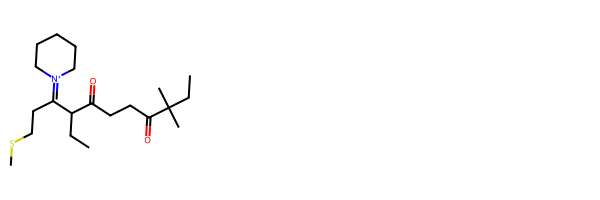

This intermediate needs to be hydrolyzed in mild acidic environment to give the target molecule
--------------------------------------
--------------------------------------


In [60]:
disconnections (smiles_disc)

The function sucesfully returns the reactants provided by the functions C_S_disconnection, alpha_carbonyl_alkylation and diacarbonyl_1_3.

In order to return the reactants as a list of Mol objects and not a nested list of Mol objects (as would have been normally, because each disconnection function returns the reactants as a list, and thus combining them makes a nested list), the function **flatten_list** is used, which flattens a list of Mol objects. This function works as shown in the cells below.

In [62]:
#Define molecules to be inlcluded in the nested list
mol_1 = Chem.MolFromSmiles('CCC')
mol_2 = Chem.MolFromSmiles('CC')
mol_3 = Chem.MolFromSmiles('C')
nested_list = [[], [mol_1], [[mol_2, mol_3]]]
print(nested_list)

[[], [<rdkit.Chem.rdchem.Mol object at 0x0000021166E83610>], [[<rdkit.Chem.rdchem.Mol object at 0x0000021166E81F50>, <rdkit.Chem.rdchem.Mol object at 0x0000021166E81FC0>]]]


In [63]:
from chemicalbd.bond_disconnector import flatten_list
flattened_list = flatten_list(nested_list)
print (flattened_list)

[<rdkit.Chem.rdchem.Mol object at 0x0000021166E83610>, <rdkit.Chem.rdchem.Mol object at 0x0000021166E81F50>, <rdkit.Chem.rdchem.Mol object at 0x0000021166E81FC0>]


The tests used for this function are very similar to the ones described for the C_S_disonnection, where it is tested if the SMILES of the outputed molecules are found in a list of expected SMILES.

## Limitations of the module

One primary limitation of the module is the fact that it recognizes a limited number of patterns, 13, whereas in organic chemistry there are thousand of patterns. In order to solve this, one could also add more and more subfunctions to the module, while keeping in mind that the functions should not interfeere with one another.

Another limitation is tied to the chemoselectivity. Although it was tried to make the reactions as chemiselective as possible, it was shown (with the 1,3 dicarbonyl function for example) that there are still examples for which the target molecule or reaction intermediate formed is not formed as a pure compound, but in a mixture.

Another limitation of the module is that the coverage is of 97.58%, although tests for different cases for all the function of the module were created. In order to increase the coverage and make it approach 100%, tests involving larger molecules than the one already tested could be done.

# Conclusion

A package which is able to disconnect chemical bonds in organic molecules has been created. Although it has its limitations, concerning the number of known disconnections or the chemoselectivity of some reactions in some cases, is still offers reactants from which patterns often encountered in organic chemistry, such as alpha substituted carbonyl or alpha-beta unsaturated carbonyl compounds, could be formed.

One farther development of this package could be including more molecular patterns to be disconnected. Another one may be making the core function, disconnections, aware of which disconnection would be the best to perform for a given molecule. By implementing such functionality, the package could be transformed in a retrosynthetic tool.